In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from matplotlib import rc
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
data = pd.read_csv('통합데이터v3.csv',encoding='utf-8')

In [3]:
data.columns

Index(['도로명전체주소', '사업장명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용명', '종별코드',
       '종별코드명', '시도코드', '시도명', '시군구코드', '시군구명', 'X좌표', 'Y좌표', '의사총수',
       '일반의 의사수', '인턴 의사수', '레지던트 의사수', '전문의합계', '내과', '신경과', '정신건강의학과', '외과',
       '정형외과', '신경외과', '흉부외과', '성형외과', '마취통증의학과', '산부인과', '소아청소년과', '안과',
       '이비인후과', '피부과', '비뇨의학과', '영상의학과', '방사선종양학과', '병리과', '진단검사의학과', '결핵과',
       '재활의학과', '핵의학과', '가정의학과', '응급의학과', '직업환경의학과', '예방의학과', '치과', '구강악안면외과',
       '치과보철과', '치과교정과', '소아치과', '치주과', '치과보존과', '구강내과', '영상치의학과', '구강병리과',
       '예방치과', '통합치의학과', '한방내과', '한방부인과', '한방소아과', '한방안·이비인후·피부과', '한방신경정신과',
       '침구과', '한방재활의학과', '사상체질과', '한방응급', '의료장비합계', '유방촬영장치', 'CT', '콘빔CT',
       '양전자단층촬영기 (PET)', '골밀도검사기', 'MRI', '초음파영상진단기', '종양치료기 (Gamma Knife)',
       '종양치료기 (Cyber Knife)', '종양치료기 (양성자치료기)', '체외충격파쇄석기', '혈액투석을위한인공신장기',
       '구글점수', '구글건수', '다음점수', '다음건수', '네이버평점', '네이버건수', '진료만족도', '의료진친절도',
       '시설만족도', '평가인원', '총건수', '최종점수', '최종보정점수'],
      dtype='object')

In [4]:
numeric = data.drop(['도로명전체주소', '사업장명','총면적', '진료과목내용명', '종별코드',
       '종별코드명', '시도코드', '시도명', '시군구코드', '시군구명', 'X좌표', 'Y좌표',
                    '구글점수', '구글건수', '다음점수', '다음건수', '네이버평점', '네이버건수','최종점수' ], axis = 1)

In [5]:
numeric.corr()

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,진료만족도,의료진친절도,시설만족도,평가인원,총건수,최종보정점수
의료인수,1.000000,0.927412,0.915735,0.956896,0.622820,0.899744,0.897376,0.966956,0.968442,0.919211,...,0.353098,0.254265,0.214532,0.573065,0.084434,0.116719,0.138068,0.726694,0.864081,0.271652
입원실수,0.927412,1.000000,0.970732,0.919716,0.589212,0.855186,0.838456,0.944167,0.943339,0.883966,...,0.344852,0.232463,0.260913,0.608638,0.102804,0.124124,0.138626,0.684369,0.842268,0.275271
병상수,0.915735,0.970732,1.000000,0.925311,0.571167,0.871651,0.864847,0.936934,0.935810,0.886879,...,0.312141,0.195835,0.287375,0.643474,0.097905,0.129978,0.149575,0.687349,0.839906,0.271040
의사총수,0.956896,0.919716,0.925311,1.000000,0.649363,0.961413,0.971838,0.988792,0.976801,0.951073,...,0.317688,0.257225,0.225613,0.575836,0.096687,0.124061,0.141623,0.724819,0.867735,0.256326
일반의 의사수,0.622820,0.589212,0.571167,0.649363,1.000000,0.598300,0.602342,0.649716,0.644578,0.643780,...,0.168596,0.301190,0.135191,0.378638,0.061785,0.024295,0.044026,0.499799,0.588150,0.113395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
의료진친절도,0.116719,0.124124,0.129978,0.124061,0.024295,0.111393,0.110191,0.130352,0.127939,0.112332,...,0.067587,0.039254,0.059335,0.073624,0.426775,1.000000,0.948614,0.147318,0.135560,0.225219
시설만족도,0.138068,0.138626,0.149575,0.141623,0.044026,0.129706,0.127097,0.147352,0.145928,0.136445,...,0.053051,0.039697,0.052201,0.097555,0.375573,0.948614,1.000000,0.158369,0.155307,0.232830
평가인원,0.726694,0.684369,0.687349,0.724819,0.499799,0.644240,0.671045,0.743347,0.737056,0.691806,...,0.180569,0.106838,0.223755,0.541049,0.057971,0.147318,0.158369,1.000000,0.775780,0.238152
총건수,0.864081,0.842268,0.839906,0.867735,0.588150,0.796414,0.796199,0.889742,0.891814,0.833097,...,0.320364,0.212007,0.234904,0.562915,0.101547,0.135560,0.155307,0.775780,1.000000,0.351534


# 진료만족도에 대한 NA 작업

In [274]:
sat = numeric.drop(['진료만족도','의료진친절도','평가인원'], axis=1)

In [275]:
sat.head()

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,시설만족도,총건수,최종보정점수
0,14.0,55.0,213.0,20.0,1.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,1.0,23.0,NaN,27,2.652909
1,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.0,147,3.244260
2,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,9.6,528,3.567129
3,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.0,40,2.721797
4,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,7.8,147,3.221450


In [276]:
sat2=sat[~sat.시설만족도.isna()]

# Mean의 Mse

In [277]:
sat1=sat[~sat.시설만족도.isna()]

In [278]:
sat1.reset_index(inplace=True)

In [279]:
sat1.drop('index',axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [280]:
sat_true=sat1.copy()

In [281]:
ktx = sat1[~sat1.시설만족도.isna()].index.tolist()

In [282]:
import random
random.seed(77)
idx = random.sample(ktx,50)

In [283]:
sat1.시설만족도.loc[idx]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [284]:
sat1.head(10)

#변환
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #'median'을 쓰면 중앙값사용
imp_mean.fit(sat1)
df_imputed_mean = pd.DataFrame(imp_mean.transform(sat1))

# 변환 후 데이터 확인
df_imputed_mean.columns = sat.columns
df_imputed_mean.head(10)

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,시설만족도,총건수,최종보정점수
0,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.000000,147.0,3.244260
1,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,8.845756,528.0,3.567129
2,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.000000,40.0,2.721797
3,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,7.800000,147.0,3.221450
4,336.0,85.0,275.0,83.0,2.0,7.0,11.0,63.0,17.0,2.0,...,2.0,16.0,0.0,0.0,0.0,1.0,43.0,10.000000,97.0,2.882957
5,118.0,63.0,210.0,24.0,1.0,0.0,0.0,23.0,6.0,1.0,...,1.0,6.0,0.0,0.0,0.0,1.0,0.0,6.500000,66.0,3.068277
6,917.0,175.0,725.0,355.0,2.0,38.0,119.0,197.0,59.0,5.0,...,3.0,52.0,0.0,1.0,0.0,1.0,42.0,8.800000,149.0,2.650779
7,946.0,174.0,689.0,388.0,6.0,30.0,131.0,221.0,59.0,6.0,...,2.0,49.0,0.0,0.0,0.0,1.0,26.0,9.700000,227.0,3.109119
8,265.0,65.0,240.0,67.0,1.0,3.0,11.0,50.0,13.0,2.0,...,2.0,19.0,0.0,0.0,0.0,1.0,30.0,8.500000,76.0,2.771073
9,1285.0,215.0,700.0,392.0,1.0,38.0,154.0,200.0,39.0,8.0,...,3.0,64.0,0.0,0.0,0.0,1.0,39.0,10.000000,206.0,2.610706


In [285]:
im = df_imputed_mean.loc[idx].시설만족도
ori = sat_true.loc[idx].시설만족도

In [286]:
from sklearn.metrics import mean_squared_error

In [287]:
mean = mean_squared_error(ori,im)
mean

2.5791556460287848

# median의 Mse

In [288]:
sat1=sat[~sat.시설만족도.isna()]

In [289]:
sat1.reset_index(inplace=True)

In [290]:
sat1.drop('index',axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [291]:
sat_true=sat1.copy()

In [292]:
ktx = sat1[~sat1.시설만족도.isna()].index.tolist()

In [293]:
import random
random.seed(77)
idx = random.sample(ktx,50)

In [294]:
sat1.시설만족도.loc[idx]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [295]:
sat1.head(10)

#변환
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median') #'median'을 쓰면 중앙값사용
imp_mean.fit(sat1)
df_imputed_median = pd.DataFrame(imp_mean.transform(sat1))

# 변환 후 데이터 확인
df_imputed_median.columns = sat1.columns
df_imputed_median.head(10)

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,시설만족도,총건수,최종보정점수
0,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.0,147.0,3.244260
1,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,9.3,528.0,3.567129
2,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.0,40.0,2.721797
3,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,7.8,147.0,3.221450
4,336.0,85.0,275.0,83.0,2.0,7.0,11.0,63.0,17.0,2.0,...,2.0,16.0,0.0,0.0,0.0,1.0,43.0,10.0,97.0,2.882957
5,118.0,63.0,210.0,24.0,1.0,0.0,0.0,23.0,6.0,1.0,...,1.0,6.0,0.0,0.0,0.0,1.0,0.0,6.5,66.0,3.068277
6,917.0,175.0,725.0,355.0,2.0,38.0,119.0,197.0,59.0,5.0,...,3.0,52.0,0.0,1.0,0.0,1.0,42.0,8.8,149.0,2.650779
7,946.0,174.0,689.0,388.0,6.0,30.0,131.0,221.0,59.0,6.0,...,2.0,49.0,0.0,0.0,0.0,1.0,26.0,9.7,227.0,3.109119
8,265.0,65.0,240.0,67.0,1.0,3.0,11.0,50.0,13.0,2.0,...,2.0,19.0,0.0,0.0,0.0,1.0,30.0,8.5,76.0,2.771073
9,1285.0,215.0,700.0,392.0,1.0,38.0,154.0,200.0,39.0,8.0,...,3.0,64.0,0.0,0.0,0.0,1.0,39.0,10.0,206.0,2.610706


In [296]:
im = df_imputed_median.loc[idx].시설만족도
ori = sat_true.loc[idx].시설만족도

In [297]:
from sklearn.metrics import mean_squared_error

In [298]:
median = mean_squared_error(ori,im)
median

2.7562

# Knn의 Mse

In [299]:
sat1=sat[~sat.시설만족도.isna()]

In [300]:
sat1.reset_index(inplace=True)

In [301]:
sat1.drop('index',axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [302]:
sat_true=sat1.copy()

In [303]:
ktx = sat1[~sat1.시설만족도.isna()].index.tolist()

In [304]:
sat1.시설만족도.loc[idx]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [356]:
# 변환 전 데이터 확인
sat.head(10)

#변환
from impyute.imputation.cs import fast_knn
np_imputed=fast_knn(sat1.values, k=7)# KNN 학습 
df_imputed_knn = pd.DataFrame(np_imputed)

# 변환 후 데이터 확인
df_imputed_knn.columns = sat1.columns
df_imputed_knn.head(10)

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,시설만족도,총건수,최종보정점수
0,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.000000,147.0,3.244260
1,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,9.321034,528.0,3.567129
2,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.000000,40.0,2.721797
3,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,7.800000,147.0,3.221450
4,336.0,85.0,275.0,83.0,2.0,7.0,11.0,63.0,17.0,2.0,...,2.0,16.0,0.0,0.0,0.0,1.0,43.0,10.000000,97.0,2.882957
5,118.0,63.0,210.0,24.0,1.0,0.0,0.0,23.0,6.0,1.0,...,1.0,6.0,0.0,0.0,0.0,1.0,0.0,6.500000,66.0,3.068277
6,917.0,175.0,725.0,355.0,2.0,38.0,119.0,197.0,59.0,5.0,...,3.0,52.0,0.0,1.0,0.0,1.0,42.0,8.800000,149.0,2.650779
7,946.0,174.0,689.0,388.0,6.0,30.0,131.0,221.0,59.0,6.0,...,2.0,49.0,0.0,0.0,0.0,1.0,26.0,9.700000,227.0,3.109119
8,265.0,65.0,240.0,67.0,1.0,3.0,11.0,50.0,13.0,2.0,...,2.0,19.0,0.0,0.0,0.0,1.0,30.0,8.500000,76.0,2.771073
9,1285.0,215.0,700.0,392.0,1.0,38.0,154.0,200.0,39.0,8.0,...,3.0,64.0,0.0,0.0,0.0,1.0,39.0,10.000000,206.0,2.610706


In [357]:
im = df_imputed_knn.loc[idx].시설만족도
ori = sat_true.loc[idx].시설만족도

In [358]:
from sklearn.metrics import mean_squared_error

In [359]:
knn = mean_squared_error(ori,im)
knn

2.5198208434859053

In [347]:
lis=[]
for i in range(1,21):
    from impyute.imputation.cs import fast_knn
    np_imputed=fast_knn(sat1.values, k=i)# KNN 학습 
    df_imputed_knn = pd.DataFrame(np_imputed)
# 변환 후 데이터 확인
    df_imputed_knn.columns = sat1.columns
    im = df_imputed_knn.loc[idx].시설만족도
    ori = sat_true.loc[idx].시설만족도
    knn = mean_squared_error(ori,im)
    lis.append(knn)

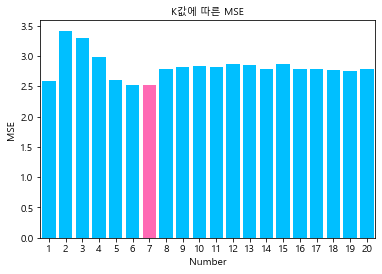

In [348]:
index = range(1,21)
# Basic Bar Chart
plt.bar(index, lis, color =  ['deepskyblue' if lis[i] != min(lis) else 'hotpink' for i in range(0,20) ])
plt.title('K값에 따른 MSE', fontsize=10)
plt.xlabel('Number', fontsize=10)
plt.ylabel('MSE', fontsize=10)
plt.xticks(index, fontsize=10)
plt.xlim([0.5,20.5])
plt.show()

# mice의 mse

In [311]:
sat1=sat[~sat.시설만족도.isna()]

In [312]:
sat1.reset_index(inplace=True)

In [313]:
sat1.drop('index',axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [314]:
sat_true=sat1.copy()

In [315]:
ktx = sat1[~sat1.시설만족도.isna()].index.tolist()

In [316]:
sat1.시설만족도.loc[idx]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [318]:
sat.head(10)

#변환
from impyute.imputation.cs import mice
np_imputed=mice(sat1.values) # mice 학습시작
df_imputed_mice = pd.DataFrame(np_imputed)

# 변환 후 데이터 확인
df_imputed_mice.columns = sat1.columns
df_imputed_mice.head(10)

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,시설만족도,총건수,최종보정점수
0,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.00000,147.0,3.244260
1,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,10.60899,528.0,3.567129
2,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.00000,40.0,2.721797
3,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,7.80000,147.0,3.221450
4,336.0,85.0,275.0,83.0,2.0,7.0,11.0,63.0,17.0,2.0,...,2.0,16.0,0.0,0.0,0.0,1.0,43.0,10.00000,97.0,2.882957
5,118.0,63.0,210.0,24.0,1.0,0.0,0.0,23.0,6.0,1.0,...,1.0,6.0,0.0,0.0,0.0,1.0,0.0,6.50000,66.0,3.068277
6,917.0,175.0,725.0,355.0,2.0,38.0,119.0,197.0,59.0,5.0,...,3.0,52.0,0.0,1.0,0.0,1.0,42.0,8.80000,149.0,2.650779
7,946.0,174.0,689.0,388.0,6.0,30.0,131.0,221.0,59.0,6.0,...,2.0,49.0,0.0,0.0,0.0,1.0,26.0,9.70000,227.0,3.109119
8,265.0,65.0,240.0,67.0,1.0,3.0,11.0,50.0,13.0,2.0,...,2.0,19.0,0.0,0.0,0.0,1.0,30.0,8.50000,76.0,2.771073
9,1285.0,215.0,700.0,392.0,1.0,38.0,154.0,200.0,39.0,8.0,...,3.0,64.0,0.0,0.0,0.0,1.0,39.0,10.00000,206.0,2.610706


In [319]:
im = df_imputed_mice.loc[idx].시설만족도
ori = sat_true.loc[idx].시설만족도

In [320]:
from sklearn.metrics import mean_squared_error

In [321]:
mice = mean_squared_error(ori,im)
mice

4.238631103907064

# em의 Mse

In [322]:
sat1=sat[~sat.시설만족도.isna()]

In [323]:
sat1.reset_index(inplace=True)

In [324]:
sat1.drop('index',axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [325]:
sat_true=sat1.copy()

In [326]:
ktx = sat1[~sat1.시설만족도.isna()].index.tolist()

In [327]:
sat1.시설만족도.loc[idx]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [328]:
sat.head(10)
#변환
from impyute.imputation.cs import em
np_imputed=em(sat1.values) # em 학습시작
df_imputed_em = pd.DataFrame(np_imputed)

# 변환 후 데이터 확인
df_imputed_em.columns = sat1.columns
df_imputed_em.head(10)

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,시설만족도,총건수,최종보정점수
0,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.000000,147.0,3.244260
1,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,8.298201,528.0,3.567129
2,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.000000,40.0,2.721797
3,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,7.800000,147.0,3.221450
4,336.0,85.0,275.0,83.0,2.0,7.0,11.0,63.0,17.0,2.0,...,2.0,16.0,0.0,0.0,0.0,1.0,43.0,10.000000,97.0,2.882957
5,118.0,63.0,210.0,24.0,1.0,0.0,0.0,23.0,6.0,1.0,...,1.0,6.0,0.0,0.0,0.0,1.0,0.0,6.500000,66.0,3.068277
6,917.0,175.0,725.0,355.0,2.0,38.0,119.0,197.0,59.0,5.0,...,3.0,52.0,0.0,1.0,0.0,1.0,42.0,8.800000,149.0,2.650779
7,946.0,174.0,689.0,388.0,6.0,30.0,131.0,221.0,59.0,6.0,...,2.0,49.0,0.0,0.0,0.0,1.0,26.0,9.700000,227.0,3.109119
8,265.0,65.0,240.0,67.0,1.0,3.0,11.0,50.0,13.0,2.0,...,2.0,19.0,0.0,0.0,0.0,1.0,30.0,8.500000,76.0,2.771073
9,1285.0,215.0,700.0,392.0,1.0,38.0,154.0,200.0,39.0,8.0,...,3.0,64.0,0.0,0.0,0.0,1.0,39.0,10.000000,206.0,2.610706


In [329]:
im = df_imputed_em.loc[idx].시설만족도
ori = sat_true.loc[idx].시설만족도

In [330]:
from sklearn.metrics import mean_squared_error

In [331]:
em = mean_squared_error(ori,im)
em

5.576611153790952

In [332]:
sat = numeric.drop(['의료진친절도','진료만족도','평가인원'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


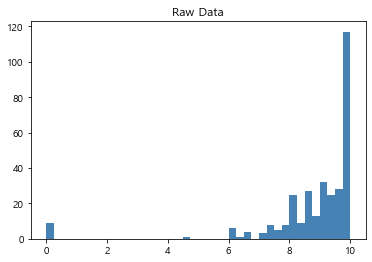

In [333]:
plt.hist(sat.시설만족도,bins=40, color='steelblue')
plt.title('Raw Data');

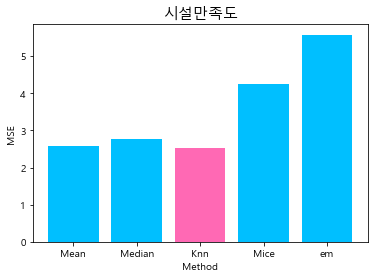

In [360]:
result = list([mean,median,knn,mice,em])
index = list(['Mean','Median','Knn','Mice','em'])
# Basic Bar Chart
plt.bar(index, result, color =  ['deepskyblue' if result[i] != min(result) else 'hotpink' for i in range(0,5) ])
plt.title('시설만족도', fontsize=15)
plt.xlabel('Method', fontsize=10)
plt.ylabel('MSE', fontsize=10)
plt.xticks(index, fontsize=10)
plt.show()

In [361]:
knn

2.5198208434859053

# mean

In [506]:
sat.시설만족도.mean()

8.850778816199373

In [507]:
sat.시설만족도.median()

9.3

In [537]:
sat.head(10)

#변환
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #'median'을 쓰면 중앙값사용
imp_mean.fit(sat)
df_imputed_mean = pd.DataFrame(imp_mean.transform(sat))

# 변환 후 데이터 확인
df_imputed_mean.columns = sat.columns
df_imputed_mean.head(10)

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,진료만족도,총건수,최종보정점수
0,14.0,55.0,213.0,20.0,1.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,1.0,23.0,9.139252,27.0,2.652909
1,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.000000,147.0,3.244260
2,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,9.700000,528.0,3.567129
3,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.000000,40.0,2.721797
4,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,8.200000,147.0,3.221450
5,336.0,85.0,275.0,83.0,2.0,7.0,11.0,63.0,17.0,2.0,...,2.0,16.0,0.0,0.0,0.0,1.0,43.0,10.000000,97.0,2.882957
6,118.0,63.0,210.0,24.0,1.0,0.0,0.0,23.0,6.0,1.0,...,1.0,6.0,0.0,0.0,0.0,1.0,0.0,7.400000,66.0,3.068277
7,917.0,175.0,725.0,355.0,2.0,38.0,119.0,197.0,59.0,5.0,...,3.0,52.0,0.0,1.0,0.0,1.0,42.0,9.100000,149.0,2.650779
8,946.0,174.0,689.0,388.0,6.0,30.0,131.0,221.0,59.0,6.0,...,2.0,49.0,0.0,0.0,0.0,1.0,26.0,10.000000,227.0,3.109119
9,265.0,65.0,240.0,67.0,1.0,3.0,11.0,50.0,13.0,2.0,...,2.0,19.0,0.0,0.0,0.0,1.0,30.0,8.200000,76.0,2.771073


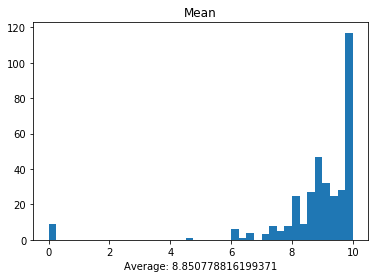

In [509]:
plt.hist(df_imputed_mean.시설만족도,bins=40)
plt.title('Mean')
plt.xlabel('Average: {}'.format(df_imputed_mean.시설만족도.mean()));

# knn

In [67]:
# 변환 전 데이터 확인
sat.head(10)

#변환
from impyute.imputation.cs import fast_knn
np_imputed=fast_knn(sat.values, k=8)# KNN 학습 
df_imputed_knn = pd.DataFrame(np_imputed)

# 변환 후 데이터 확인
df_imputed_knn.columns = sat.columns
df_imputed_knn.head(10)

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,의료진친절도,총건수,최종보정점수
0,14.0,55.0,213.0,20.0,1.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,1.0,23.0,7.544859,27.0,2.652909
1,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.000000,147.0,3.244260
2,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,9.400000,528.0,3.567129
3,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.000000,40.0,2.721797
4,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,7.800000,147.0,3.221450
5,336.0,85.0,275.0,83.0,2.0,7.0,11.0,63.0,17.0,2.0,...,2.0,16.0,0.0,0.0,0.0,1.0,43.0,10.000000,97.0,2.882957
6,118.0,63.0,210.0,24.0,1.0,0.0,0.0,23.0,6.0,1.0,...,1.0,6.0,0.0,0.0,0.0,1.0,0.0,5.800000,66.0,3.068277
7,917.0,175.0,725.0,355.0,2.0,38.0,119.0,197.0,59.0,5.0,...,3.0,52.0,0.0,1.0,0.0,1.0,42.0,8.800000,149.0,2.650779
8,946.0,174.0,689.0,388.0,6.0,30.0,131.0,221.0,59.0,6.0,...,2.0,49.0,0.0,0.0,0.0,1.0,26.0,9.700000,227.0,3.109119
9,265.0,65.0,240.0,67.0,1.0,3.0,11.0,50.0,13.0,2.0,...,2.0,19.0,0.0,0.0,0.0,1.0,30.0,8.600000,76.0,2.771073


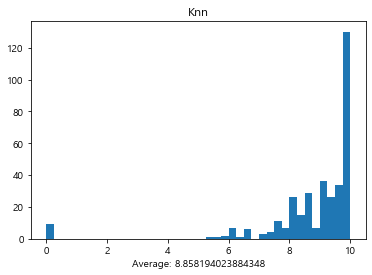

In [70]:
plt.hist(df_imputed_knn.의료진친절도,bins=40)
plt.title('Knn')
plt.xlabel('Average: {}'.format(df_imputed_knn.의료진친절도.mean()));

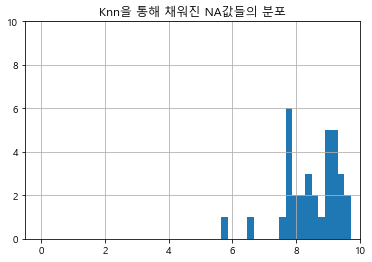

In [71]:
plt.hist(df_imputed_knn[sat.의료진친절도.isna()].의료진친절도,bins=20)
plt.axis([-0.5, 10, 0, 10]) 
plt.title('Knn을 통해 채워진 NA값들의 분포')
plt.grid(True)

In [72]:
df_imputed_knn[sat.의료진친절도.isna()]

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,의료진친절도,총건수,최종보정점수
0,14.0,55.0,213.0,20.0,1.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,1.0,23.0,7.544859,27.0,2.652909
29,60.0,69.0,265.0,15.0,0.0,0.0,0.0,15.0,2.0,1.0,...,1.0,9.0,0.0,0.0,0.0,1.0,1.0,8.170095,17.0,1.324030
34,63.0,52.0,253.0,21.0,0.0,0.0,0.0,21.0,3.0,1.0,...,1.0,7.0,0.0,0.0,0.0,1.0,21.0,9.246105,23.0,1.537662
70,137.0,36.0,205.0,16.0,2.0,0.0,0.0,14.0,2.0,0.0,...,1.0,4.0,0.0,0.0,0.0,1.0,32.0,9.063532,26.0,2.126347
72,100.0,52.0,233.0,18.0,3.0,0.0,0.0,15.0,4.0,0.0,...,4.0,9.0,0.0,0.0,0.0,1.0,59.0,9.269205,15.0,2.005819
78,190.0,79.0,270.0,28.0,3.0,0.0,0.0,24.0,5.0,2.0,...,2.0,9.0,0.0,0.0,0.0,0.0,28.0,9.197119,111.0,2.736486
106,1037.0,233.0,988.0,311.0,0.0,35.0,102.0,173.0,44.0,7.0,...,4.0,29.0,0.0,0.0,0.0,1.0,6.0,9.582290,173.0,3.108729
107,192.0,54.0,201.0,34.0,4.0,0.0,0.0,30.0,6.0,2.0,...,1.0,11.0,0.0,0.0,0.0,1.0,11.0,8.487083,42.0,2.193452
124,165.0,93.0,385.0,19.0,2.0,0.0,0.0,17.0,3.0,0.0,...,1.0,5.0,0.0,0.0,0.0,0.0,15.0,7.739082,14.0,1.494612
130,57.0,57.0,180.0,15.0,2.0,0.0,0.0,12.0,2.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.558056,18.0,1.571929


# mice

In [540]:
sat.head(10)

#변환
from impyute.imputation.cs import mice
np_imputed=mice(sat.values) # mice 학습시작
df_imputed_mice = pd.DataFrame(np_imputed)

# 변환 후 데이터 확인
df_imputed_mice.columns = sat.columns
df_imputed_mice.head(10)

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,진료만족도,총건수,최종보정점수
0,14.0,55.0,213.0,20.0,1.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,1.0,23.0,9.126984,27.0,2.652909
1,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.000000,147.0,3.244260
2,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,9.700000,528.0,3.567129
3,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.000000,40.0,2.721797
4,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,8.200000,147.0,3.221450
5,336.0,85.0,275.0,83.0,2.0,7.0,11.0,63.0,17.0,2.0,...,2.0,16.0,0.0,0.0,0.0,1.0,43.0,10.000000,97.0,2.882957
6,118.0,63.0,210.0,24.0,1.0,0.0,0.0,23.0,6.0,1.0,...,1.0,6.0,0.0,0.0,0.0,1.0,0.0,7.400000,66.0,3.068277
7,917.0,175.0,725.0,355.0,2.0,38.0,119.0,197.0,59.0,5.0,...,3.0,52.0,0.0,1.0,0.0,1.0,42.0,9.100000,149.0,2.650779
8,946.0,174.0,689.0,388.0,6.0,30.0,131.0,221.0,59.0,6.0,...,2.0,49.0,0.0,0.0,0.0,1.0,26.0,10.000000,227.0,3.109119
9,265.0,65.0,240.0,67.0,1.0,3.0,11.0,50.0,13.0,2.0,...,2.0,19.0,0.0,0.0,0.0,1.0,30.0,8.200000,76.0,2.771073


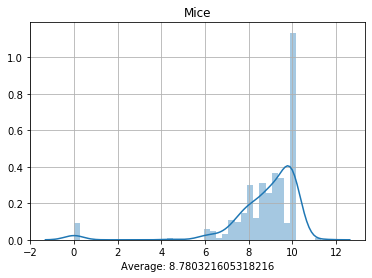

In [532]:
sns.distplot(df_imputed_mice.시설만족도,bins=40, kde=True)
plt.title('Mice')
plt.grid(True)
plt.xlabel('Average: {}'.format(df_imputed_mice.시설만족도.mean()));

# em

In [541]:
sat.head(10)
#변환
from impyute.imputation.cs import em
np_imputed=em(sat.values) # em 학습시작
df_imputed_em = pd.DataFrame(np_imputed)

# 변환 후 데이터 확인
df_imputed_em.columns = sat.columns
df_imputed_em.head(10)

,의료인수,입원실수,병상수,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의합계,내과,신경과,...,MRI,초음파영상진단기,종양치료기 (Gamma Knife),종양치료기 (Cyber Knife),종양치료기 (양성자치료기),체외충격파쇄석기,혈액투석을위한인공신장기,진료만족도,총건수,최종보정점수
0,14.0,55.0,213.0,20.0,1.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,1.0,23.0,9.701075,27.0,2.652909
1,796.0,303.0,653.0,182.0,1.0,0.0,0.0,181.0,43.0,8.0,...,2.0,46.0,0.0,0.0,0.0,1.0,48.0,10.000000,147.0,3.244260
2,4758.0,823.0,2455.0,1183.0,7.0,132.0,212.0,828.0,215.0,26.0,...,13.0,114.0,1.0,1.0,0.0,1.0,78.0,9.700000,528.0,3.567129
3,112.0,59.0,207.0,21.0,3.0,0.0,0.0,18.0,4.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,14.0,10.000000,40.0,2.721797
4,840.0,168.0,623.0,224.0,1.0,26.0,71.0,124.0,35.0,5.0,...,3.0,35.0,0.0,0.0,0.0,1.0,55.0,8.200000,147.0,3.221450
5,336.0,85.0,275.0,83.0,2.0,7.0,11.0,63.0,17.0,2.0,...,2.0,16.0,0.0,0.0,0.0,1.0,43.0,10.000000,97.0,2.882957
6,118.0,63.0,210.0,24.0,1.0,0.0,0.0,23.0,6.0,1.0,...,1.0,6.0,0.0,0.0,0.0,1.0,0.0,7.400000,66.0,3.068277
7,917.0,175.0,725.0,355.0,2.0,38.0,119.0,197.0,59.0,5.0,...,3.0,52.0,0.0,1.0,0.0,1.0,42.0,9.100000,149.0,2.650779
8,946.0,174.0,689.0,388.0,6.0,30.0,131.0,221.0,59.0,6.0,...,2.0,49.0,0.0,0.0,0.0,1.0,26.0,10.000000,227.0,3.109119
9,265.0,65.0,240.0,67.0,1.0,3.0,11.0,50.0,13.0,2.0,...,2.0,19.0,0.0,0.0,0.0,1.0,30.0,8.200000,76.0,2.771073


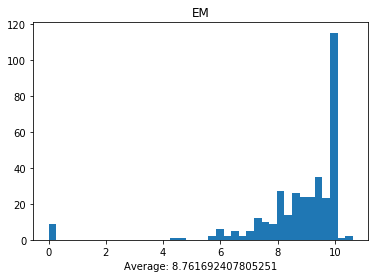

In [518]:
plt.hist(df_imputed_em.시설만족도,bins=40)
plt.title('EM')
plt.xlabel('Average: {}'.format(df_imputed_em.시설만족도.mean()));

In [546]:
aa = list([df_imputed_mean.진료만족도.mean(),df_imputed_knn.진료만족도.mean(),df_imputed_mice.진료만족도.mean(),df_imputed_em.진료만족도.mean()])

In [566]:
value = pd.DataFrame(aa,['mean','knn','mice','em'])
value = value.rename(columns={0:'Average'})
value

,Average
mean,9.139252
knn,9.140809
mice,9.126968
em,9.106161


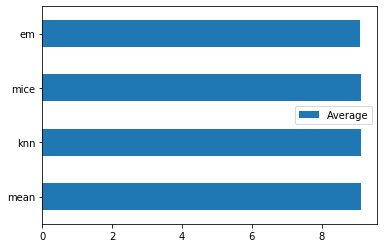

In [565]:
value.plot(kind='barh')

In [570]:
reg = data[['시도명','최종보정점수']]

In [575]:
reg['시도명']

0      인천
1      서울
2      서울
3      서울
4      서울
       ..
350    충북
351    충북
352    경기
353    충남
354    충남
Name: 시도명, Length: 355, dtype: object

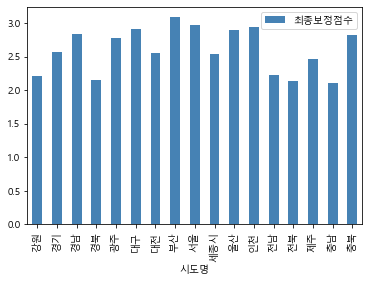

In [586]:
reg.pivot_table(index='시도명',values='최종보정점수').plot(kind='bar',color='steelblue')

In [587]:
reg = data[['의료인수','최종보정점수']]

In [598]:
reg.의료인수

0       1
1       9
2      10
3       3
4       9
       ..
350     8
351     5
352     9
353     2
354     1
Name: 의료인수, Length: 355, dtype: int64

In [599]:
bins = np.percentile(reg.의료인수, [0,10,20,30,40,50,60,70,80,90])

In [600]:
reg['의료인수'] = np.digitize(reg['의료인수'], bins)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [603]:
reg

,의료인수,최종보정점수
0,1,2.652909
1,9,3.244260
2,10,3.567129
3,3,2.721797
4,9,3.221450
...,...,...
350,8,3.246228
351,5,3.312500
352,9,2.472434
353,2,2.668103


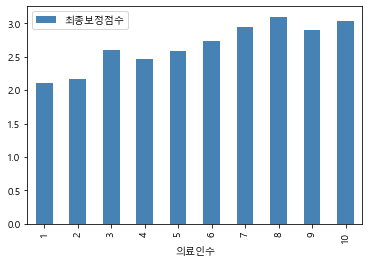

In [602]:
reg.pivot_table(index='의료인수',values='최종보정점수').plot(kind='bar',color='steelblue')

In [10]:
reg = data[['의료인수','최종점수']]

In [11]:
bins = np.percentile(reg.의료인수, [0,10,20,30,40,50,60,70,80,90])

In [12]:
reg['의료인수'] = np.digitize(reg['의료인수'], bins)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


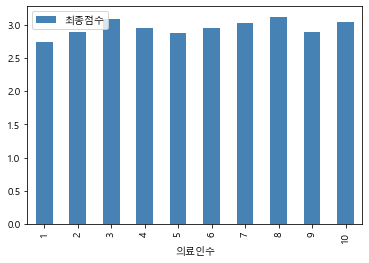

In [18]:
reg.pivot_table(index='의료인수',values='최종점수').plot(kind='bar',color='steelblue')

In [23]:
data.의료진친절도.isna().sum()

34

In [1]:
a=[1,2,3,4,5]

In [5]:
for i in range(len(a)):
    print('{}'.format(a[i]))

1
2
3
4
5
